In [34]:
#Data Wrangling
#Enkhchimeg Tsendnyam
#Merging the Data and Storing in a Database/Visualizing Data

In [35]:
import sqlite3
import pandas as pd

In [45]:
conn = sqlite3.connect("finalproject.db")

In [46]:
cur = conn.cursor()

In [146]:
df_glassdoor_data = pd.read_csv("/Users/Chimpukh/dataset#1.csv")
df_glassdoor_data.head()

job_title  gender  age  performance_eval education_level  \
0     graphic designer  female   18                 5         college   
1    software engineer    male   21                 5         college   
2  warehouse associate  female   19                 4             phd   
3    software engineer    male   20                 5         masters   
4     graphic designer    male   26                 5         masters   

       department  seniority_level  base_pay  bonus  
0      operations                2     42363   9938  
1      management                5    108476  11128  
2  administration                5     90208   9268  
3           sales                4    108080  10154  
4     engineering                5     99464   9319

In [207]:
df_glassdoor_data.to_sql("table_1", conn)  #load the first dataset into a 

In [190]:
df_bls_data = pd.read_csv("/Users/Chimpukh/dataset#2.csv")
df_bls_data.head()

department                                         Occupation Gender  \
0  administration                                service occupations   male   
1           sales                       sales and office occupations   male   
2           sales                      sales and related occupations   male   
3  administration      office and administrative support occupations   male   
4     engineering  natural resources, construction, and maintenan...   male   

   Number_of_workers_3rd_2019  Number_of_workers_3rd_2020  \
0                        8297                        6686   
1                        9640                        8216   
2                        5481                        4788   
3                        4159                        3428   
4                       11250                       10186   

   Median_weekly_earnings_3rd_2019  Median_weekly_earnings_3rd_2020  
0                              658                              721  
1                              854                              983  
2                              955                             1070  
3                              764                              935  
4                              883                              914

In [208]:
df_bls_data.to_sql("table_2", conn)  #load the second dataset into a database

In [191]:
df_currency_data = pd.read_csv("/Users/Chimpukh/dataset#3.csv")
df_currency_data.head()

currency_conversion  success                            terms  \
0              USDAED     True  https://currencylayer.com/terms   
1              USDAFN     True  https://currencylayer.com/terms   
2              USDALL     True  https://currencylayer.com/terms   
3              USDAMD     True  https://currencylayer.com/terms   
4              USDANG     True  https://currencylayer.com/terms   

                             privacy            timestamp source       rates  
0  https://currencylayer.com/privacy  2020-11-21 16:41:05    usd    3.673042  
1  https://currencylayer.com/privacy  2020-11-21 16:41:05    usd   77.050404  
2  https://currencylayer.com/privacy  2020-11-21 16:41:05    usd  104.050403  
3  https://currencylayer.com/privacy  2020-11-21 16:41:05    usd  503.220403  
4  https://currencylayer.com/privacy  2020-11-21 16:41:05    usd    1.795142

In [209]:
df_currency_data.to_sql("table_3", conn)  #load the third dataset into a database

In [365]:
#SQL Joins - 1st attempt
sql = '''SELECT table_1.job_title, table_1.gender, table_1.age, table_1.performance_eval, table_1.education_level, table_1.seniority_level, table_1.base_pay, table_1.bonus, table_2.Occupation, table_2.Median_weekly_earnings_3rd_2020, table_2.Number_of_workers_3rd_2020
FROM table_1
LEFT JOIN table_2 ON 
table_1.department = table_2.department
union
SELECT table_1.job_title, table_1.gender, table_1.age, table_1.performance_eval, table_1.education_level, table_1.seniority_level, table_1.base_pay, table_1.bonus, table_2.Occupation, table_2.Median_weekly_earnings_3rd_2020, table_2.Number_of_workers_3rd_2020
FROM table_2
LEFT JOIN table_1 ON 
table_1.department = table_2.department
'''

In [366]:
rows = cur.execute(sql)

In [367]:
conn.commit()

In [368]:
columns = ['job_title', 'gender', 'age', 'performance_eval', 'education_level', 'seniority_level', 'base_pay', 'bonus', 'occupation', 'weekly_earnings', 'q3workernumbers']

In [369]:
df = pd.DataFrame(rows,columns = columns)

In [370]:
df #tables are not correctly joining are we can see duplicate rows

job_title  gender   age  performance_eval education_level  \
0                    None    None   NaN               NaN            None   
1                    None    None   NaN               NaN            None   
2          data scientist  female  20.0               3.0     high school   
3          data scientist  female  20.0               3.0     high school   
4          data scientist  female  20.0               3.0     high school   
5          data scientist  female  20.0               3.0     high school   
6          data scientist  female  20.0               3.0     high school   
7          data scientist  female  20.0               3.0     high school   
8          data scientist  female  20.0               3.0     high school   
9          data scientist  female  21.0               1.0             phd   
10         data scientist  female  21.0               1.0             phd   
11         data scientist  female  21.0               1.0             phd   
12         data scientist  female  21.0               1.0             phd   
13         data scientist  female  21.0               1.0             phd   
14         data scientist  female  21.0               1.0             phd   
15         data scientist  female  21.0               1.0             phd   
16         data scientist  female  21.0               5.0             phd   
17         data scientist  female  21.0               5.0             phd   
18         data scientist  female  21.0               5.0             phd   
19         data scientist  female  21.0               5.0             phd   
20         data scientist  female  21.0               5.0             phd   
21         data scientist  female  22.0               5.0     high school   
22         data scientist  female  22.0               5.0     high school   
23         data scientist  female  22.0               5.0     high school   
24         data scientist  female  22.0               5.0     high school   
25         data scientist  female  22.0               5.0     high school   
26         data scientist  female  22.0               5.0     high school   
27         data scientist  female  22.0               5.0     high school   
28         data scientist  female  24.0               4.0         college   
29         data scientist  female  24.0               4.0         college   
30         data scientist  female  24.0               4.0         college   
31         data scientist  female  24.0               4.0         college   
32         data scientist  female  24.0               4.0         college   
33         data scientist  female  24.0               4.0         college   
34         data scientist  female  24.0               4.0         college   
35         data scientist  female  27.0               1.0     high school   
36         data scientist  female  27.0               1.0     high school   
37         data scientist  female  27.0               1.0     high school   
38         data scientist  female  27.0               1.0     high school   
39         data scientist  female  27.0               1.0     high school   
40         data scientist  female  27.0               1.0     high school   
41         data scientist  female  27.0               1.0     high school   
42         data scientist  female  29.0               3.0     high school   
43         data scientist  female  29.0               4.0         college   
44         data scientist  female  29.0               4.0         college   
45         data scientist  female  29.0               4.0         college   
46         data scientist  female  29.0               4.0         college   
47         data scientist  female  29.0               4.0         college   
48         data scientist  female  29.0               4.0     high school   
49         data scientist  female  29.0               4.0     high school   
50         data scientist  female  29.0               4.0     high school   
51         d

In [364]:
print(df.shape)

(4565, 11)


In [267]:
#SQL Joins - 2nd attempt
sql = '''SELECT table_1.job_title, table_1.gender, table_1.age, table_1.performance_eval, table_1.education_level, table_1.seniority_level, table_1.base_pay, table_1.bonus, table_2.Occupation
FROM table_1
LEFT JOIN table_2 ON 
table_1.department = table_2.department
union
SELECT table_1.job_title, table_1.gender, table_1.age, table_1.performance_eval, table_1.education_level, table_1.seniority_level, table_1.base_pay, table_1.bonus, table_2.Occupation
FROM table_2
LEFT JOIN table_1 ON 
table_1.department = table_2.department
'''

In [268]:
rows1 = cur.execute(sql)

In [269]:
conn.commit()

In [270]:
columns1 = ['job_title', 'gender', 'age', 'performance_eval', 'education_level', 'seniority_level', 'base_pay', 'bonus', 'occupation']

In [271]:
df1 = pd.DataFrame(rows1,columns = columns1)

In [272]:
df1 #tables are still not correctly joining are we can see duplicate rows 

job_title  gender   age  performance_eval education_level  \
0                    None    None   NaN               NaN            None   
1                    None    None   NaN               NaN            None   
2          data scientist  female  20.0               3.0     high school   
3          data scientist  female  20.0               3.0     high school   
4          data scientist  female  20.0               3.0     high school   
5          data scientist  female  20.0               3.0     high school   
6          data scientist  female  21.0               1.0             phd   
7          data scientist  female  21.0               1.0             phd   
8          data scientist  female  21.0               1.0             phd   
9          data scientist  female  21.0               1.0             phd   
10         data scientist  female  21.0               5.0             phd   
11         data scientist  female  21.0               5.0             phd   
12         data scientist  female  21.0               5.0             phd   
13         data scientist  female  22.0               5.0     high school   
14         data scientist  female  22.0               5.0     high school   
15         data scientist  female  22.0               5.0     high school   
16         data scientist  female  22.0               5.0     high school   
17         data scientist  female  24.0               4.0         college   
18         data scientist  female  24.0               4.0         college   
19         data scientist  female  24.0               4.0         college   
20         data scientist  female  24.0               4.0         college   
21         data scientist  female  27.0               1.0     high school   
22         data scientist  female  27.0               1.0     high school   
23         data scientist  female  27.0               1.0     high school   
24         data scientist  female  27.0               1.0     high school   
25         data scientist  female  29.0               3.0     high school   
26         data scientist  female  29.0               4.0         college   
27         data scientist  female  29.0               4.0         college   
28         data scientist  female  29.0               4.0         college   
29         data scientist  female  29.0               4.0     high school   
30         data scientist  female  29.0               4.0     high school   
31         data scientist  female  29.0               4.0     high school   
32         data scientist  female  29.0               4.0     high school   
33         data scientist  female  30.0               5.0         college   
34         data scientist  female  30.0               5.0         college   
35         data scientist  female  30.0               5.0         college   
36         data scientist  female  30.0               5.0         college   
37         data scientist  female  31.0               4.0     high school   
38         data scientist  female  31.0               4.0     high school   
39         data scientist  female  31.0               4.0     high school   
40         data scientist  female  32.0               4.0         college   
41         data scientist  female  32.0               5.0             phd   
42         data scientist  female  32.0               5.0             phd   
43         data scientist  female  32.0               5.0             phd   
44         data scientist  female  32.0               5.0             phd   
45         data scientist  female  33.0               2.0     high school   
46         data scientist  female  33.0               2.0     high school   
47         data scientist  female  33.0               2.0     high school   
48         data scientist  female  33.0               3.0         college   
49         data scientist  female  33.0               3.0         college   
50         data scientist  female  33.0               3.0     high school   
51         d

In [273]:
print(df1.shape)

(2779, 9)


In [274]:
#SQL Joins - 3rd attempt
sql = '''SELECT table_1.job_title, table_1.gender, table_1.age, table_1.performance_eval, table_1.education_level, table_1.seniority_level, table_1.base_pay, table_1.bonus
FROM table_1
LEFT JOIN table_2 ON 
table_1.department = table_2.department
union
SELECT table_1.job_title, table_1.gender, table_1.age, table_1.performance_eval, table_1.education_level, table_1.seniority_level, table_1.base_pay, table_1.bonus
FROM table_2
LEFT JOIN table_1 ON 
table_1.department = table_2.department
'''

In [275]:
rows2 = cur.execute(sql)

In [276]:
conn.commit()

In [277]:
columns2 = ['job_title', 'gender', 'age', 'performance_eval', 'education_level', 'seniority_level', 'base_pay', 'bonus']

In [278]:
df2 = pd.DataFrame(rows2,columns = columns2)

In [279]:
df2 #table is back to the original format of table_1, unfortunately, table_1 will have to proceed for visualizations on its own

job_title  gender   age  performance_eval education_level  \
0                   None    None   NaN               NaN            None   
1         data scientist  female  20.0               3.0     high school   
2         data scientist  female  21.0               1.0             phd   
3         data scientist  female  21.0               5.0             phd   
4         data scientist  female  22.0               5.0     high school   
5         data scientist  female  24.0               4.0         college   
6         data scientist  female  27.0               1.0     high school   
7         data scientist  female  29.0               3.0     high school   
8         data scientist  female  29.0               4.0         college   
9         data scientist  female  29.0               4.0     high school   
10        data scientist  female  30.0               5.0         college   
11        data scientist  female  31.0               4.0     high school   
12        data scientist  female  32.0               4.0         college   
13        data scientist  female  32.0               5.0             phd   
14        data scientist  female  33.0               2.0     high school   
15        data scientist  female  33.0               3.0         college   
16        data scientist  female  33.0               3.0     high school   
17        data scientist  female  33.0               5.0         masters   
18        data scientist  female  34.0               3.0             phd   
19        data scientist  female  36.0               3.0     high school   
20        data scientist  female  37.0               2.0         college   
21        data scientist  female  37.0               4.0         masters   
22        data scientist  female  38.0               5.0         masters   
23        data scientist  female  39.0               3.0         masters   
24        data scientist  female  39.0               4.0             phd   
25        data scientist  female  40.0               1.0         masters   
26        data scientist  female  41.0               2.0             phd   
27        data scientist  female  43.0               2.0             phd   
28        data scientist  female  45.0               3.0         masters   
29        data scientist  female  45.0               5.0             phd   
30        data scientist  female  46.0               3.0         college   
31        data scientist  female  48.0               2.0         college   
32        data scientist  female  48.0               5.0         masters   
33        data scientist  female  49.0               3.0         college   
34        data scientist  female  49.0               5.0         college   
35        data scientist  female  51.0               1.0             phd   
36        data scientist  female  53.0               2.0         masters   
37        data scientist  female  53.0               2.0             phd   
38        data scientist  female  53.0               5.0         masters   
39        data scientist  female  55.0               2.0         masters   
40        data scientist  female  55.0               3.0         masters   
41        data scientist  female  55.0               3.0             phd   
42        data scientist  female  56.0               1.0         college   
43        data scientist  female  57.0               1.0             phd   
44        data scientist  female  57.0               3.0         masters   
45        data scientist  female  57.0               4.0     high school   
46        data scientist  female  57.0               4.0             phd   
47        data scientist  female  58.0               1.0     high school   
48        data scientist  female  58.0               1.0             phd   
49        data scientist  female  58.0               2.0             phd   
50        data scientist  female  61.0               5.0         masters   
51        data scientist  female  63.0               2.0     hi

In [280]:
print(df2.shape)

(998, 8)


In [312]:
#Plot 5 Visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot 
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

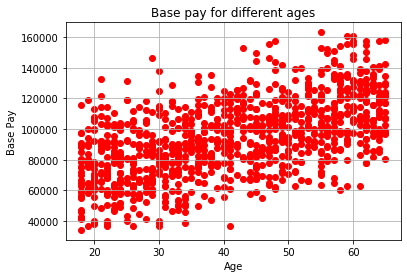

In [300]:
#Base Pay by Age
x = df2.base_pay
y = df2.age
plt.scatter(y,x, color = 'red')
plt.title('Base pay for different ages')
plt.xlabel('Age')
plt.ylabel('Base Pay')
plt.grid(True)

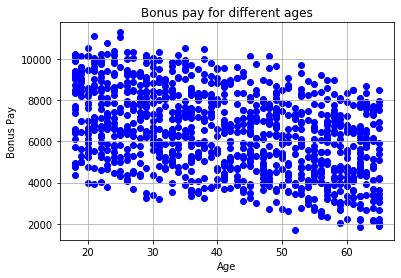

In [301]:
#Base Bonus By Age
x = df2.bonus
y = df2.age
plt.scatter(y,x, color = 'blue')
plt.title('Bonus pay for different ages')
plt.xlabel('Age')
plt.ylabel('Bonus Pay')
plt.grid(True)

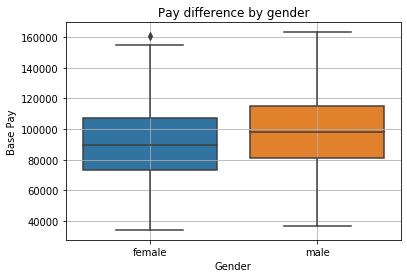

In [335]:
#Pay difference by gender
sns.boxplot(x=df2['gender'], y=df2['base_pay'], data=pd.melt(df2))
plt.title('Pay difference by gender')
plt.xlabel('Gender')
plt.ylabel('Base Pay')
plt.grid(True)

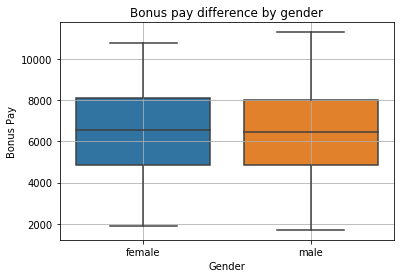

In [336]:
#Bonus difference by gender
sns.boxplot(x=df2['gender'], y=df2['bonus'], data=pd.melt(df2))
plt.title('Bonus pay difference by gender')
plt.xlabel('Gender')
plt.ylabel('Bonus Pay')
plt.grid(True)

Text(21.151640625, 0.5, 'Job title count')

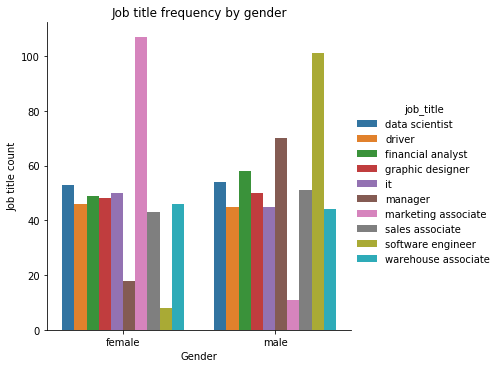

In [352]:
#Job title frequency by gender
sns.catplot(x="gender", hue="job_title", kind="count", data=df2)
plt.title('Job title frequency by gender')
plt.xlabel('Gender')
plt.ylabel('Job title count')

Text(16.31944444444445, 0.5, 'Education level count')

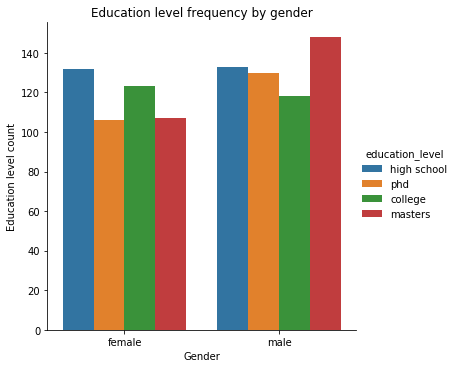

In [351]:
sns.catplot(x="gender", hue="education_level", kind="count", data=df2)
plt.title('Education level frequency by gender')
plt.xlabel('Gender')
plt.ylabel('Education level count')

Text(16.817777777777785, 0.5, 'Performace level count')

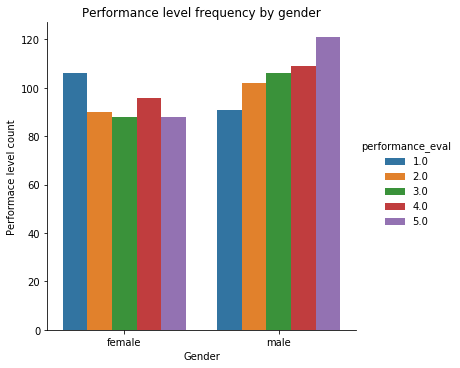

In [357]:
sns.catplot(x="gender", hue="performance_eval", kind="count", data=df2)
plt.title('Performance level frequency by gender')
plt.xlabel('Gender')
plt.ylabel('Performace level count')